In [1]:
import pandas as pd
import matplotlib.pyplot as plt

- estimates of diabetes prevalence worldwide for individuals aged 20 to 79
- data on the number of people with diabetes in thousands, categorised by region and country.
- The dataset spans several years (2000, 2011, 2021, 2030, and 2045),

In [2]:
all_data = pd.read_excel("../Case/Health Data from International Diabetes Foundation.xlsx", header=1, sheet_name=None)

In [3]:
all_data.keys()

dict_keys(['People with diabetes (1000s)', 'Diabetes prevalence (%)', 'People undiagnosed (1000s)', 'People undiagnosed (proportion)', 'Deaths attributable to diabetes', 'Diabetes-related deaths (propo)', 'Total diabetes costs (USD mill)', 'Diabetes costs per person (USD)', 'People with Type 1 (in 1000s)', 'New cases of Type 1 (in 1000s)'])

People with diabetes (1000s)

In [4]:
data = all_data["People with diabetes (1000s)"]
data.head(150)

,#,Region,Country/Territory,2000,2011,2021,2030,2045,Type
0,1,Africa,Africa,"2,532.9","14,700.0","23,633.9","33,446.0","55,254.4",Region
1,2,Europe,Europe,"22,373.1","52,770.8","61,425.1","67,000.0","69,000.0",Region
2,3,Middle East and North Africa,Middle East and North Africa,"17,007.6","32,600.0","72,671.9","95,000.0","135,700.0",Region
3,4,North America and Caribbean,North America and Caribbean,"21,375.1","37,700.0","50,547.0","57,000.0","63,000.0",Region
4,5,South and Central America,South and Central America,"8,553.3","25,121.5","32,497.1","40,000.0","49,000.0",Region
...,...,...,...,...,...,...,...,...,...
145,146,Western Pacific,Myanmar,-,"2,103.7","2,346.6","2,791.4","3,437.9",Country
146,147,Africa,Namibia,-,74.1,75,102.5,166.4,Country
147,148,Western Pacific,Nauru,-,1.2,1.5,1.7,1.8,Country
148,149,South-East Asia,Nepal,-,488.2,"1,133.5","1,553.4","2,180.1",Country


In [6]:
def get_value(v):
    if v == "-":
        return 0
    if isinstance(v, str):
       v = v.replace(",", "") 
    return float(v)

In [22]:
regions = {name: {} for name in data.Region.unique()}
regions

{'Africa': {},
 'Europe': {},
 'Middle East and North Africa': {},
 'North America and Caribbean': {},
 'South and Central America': {},
 'South-East Asia': {},
 'Western Pacific': {}}

In [17]:
regions = {name: {} for name in data.Region.unique()}
total = {name: [] for name in data.Region.unique()}

for row in data.iterrows():
    row = row[1]
    if row["Region"] == row["Country/Territory"]:
        total[row["Region"]].append([get_value(row[2000]), get_value(row[2011]), get_value(row[2021]), get_value(row[2030]), get_value(row[2045])])
        continue
    reqion_dict = regions[row["Region"]]
    reqion_dict["2000"] = reqion_dict.get("2000", 0) + get_value(row[2000])
    reqion_dict["2011"] = reqion_dict.get("2011", 0) + get_value(row[2011])
    reqion_dict["2021"] = reqion_dict.get("2021", 0) + get_value(row[2021])
    reqion_dict["2030"] = reqion_dict.get("2030", 0) + get_value(row[2030])
    reqion_dict["2045"] = reqion_dict.get("2045", 0) + get_value(row[2045])

In [8]:
total

{'Africa': [[2532.9, 14700.0, 23633.9, 33446.0, 55254.4]],
 'Europe': [[22373.1, 52770.8, 61425.1, 67000.0, 69000.0]],
 'Middle East and North Africa': [[17007.6,
   32600.0,
   72671.9,
   95000.0,
   135700.0]],
 'North America and Caribbean': [[21375.1,
   37700.0,
   50547.0,
   57000.0,
   63000.0]],
 'South and Central America': [[8553.3, 25121.5, 32497.1, 40000.0, 49000.0]],
 'South-East Asia': [[34882.2, 71406.9, 90204.5, 113300.0, 151500.0]],
 'Western Pacific': [[44097.9, 131895.1, 205640.2, 238300.0, 260200.0]]}

In [9]:
regions

{'Africa': {'2000': 2532.8,
  '2011': 14700.400000000003,
  '2021': 23633.9,
  '2030': 33172.299999999996,
  '2045': 54896.8},
 'Europe': {'2000': 22467.799999999996,
  '2011': 52771.000000000015,
  '2021': 61425.5,
  '2030': 66585.30000000002,
  '2045': 69181.09999999999},
 'Middle East and North Africa': {'2000': 17007.699999999997,
  '2011': 32602.8,
  '2021': 72671.89999999998,
  '2030': 94884.90000000002,
  '2045': 135746.5},
 'North America and Caribbean': {'2000': 21399.8,
  '2011': 37921.4,
  '2021': 50546.9,
  '2030': 56592.90000000001,
  '2045': 62763.8},
 'South and Central America': {'2000': 8528.6,
  '2011': 25133.699999999997,
  '2021': 32497.099999999995,
  '2030': 39773.8,
  '2045': 48890.29999999999},
 'South-East Asia': {'2000': 34882.1,
  '2011': 71406.9,
  '2021': 90204.29999999999,
  '2030': 113279.0,
  '2045': 151511.40000000002},
 'Western Pacific': {'2000': 44097.899999999994,
  '2011': 131896.40000000002,
  '2021': 205640.3,
  '2030': 238343.50000000003,
  '204

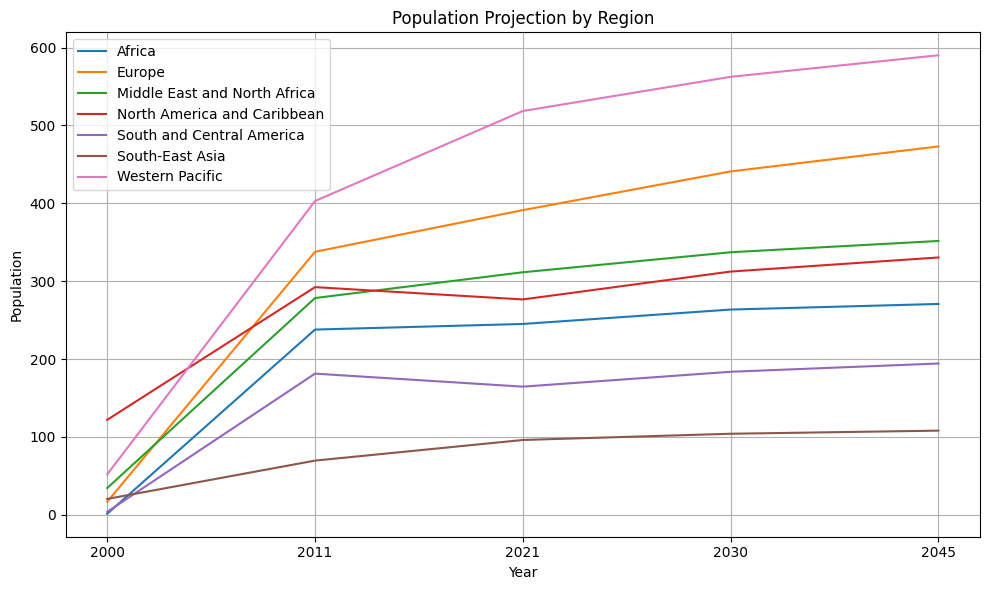

In [28]:
# data = all_data["Diabetes costs per person (USD)"]
data = all_data["Diabetes prevalence (%)"]
regions = {name: {} for name in data.Region.unique()}

years = ['2000', '2011', '2021', '2030', '2045']

for row in data.iterrows():
    row = row[1]
    reqion_dict = regions[row["Region"]]
    reqion_dict["2000"] = reqion_dict.get("2000", 0) + get_value(row[2000])
    reqion_dict["2011"] = reqion_dict.get("2011", 0) + get_value(row[2011])
    reqion_dict["2021"] = reqion_dict.get("2021", 0) + get_value(row[2021])
    reqion_dict["2030"] = reqion_dict.get("2030", 0) + get_value(row[2030])
    reqion_dict["2045"] = reqion_dict.get("2045", 0) + get_value(row[2045])

plt.figure(figsize=(10, 6))

for region, values in regions.items():
    plt.plot(years, list(values.values()), label=region)

plt.title('Population Projection by Region')
plt.xlabel('Year')
plt.ylabel('Population')
plt.legend()
plt.grid(True)
plt.tight_layout()
plt.show()

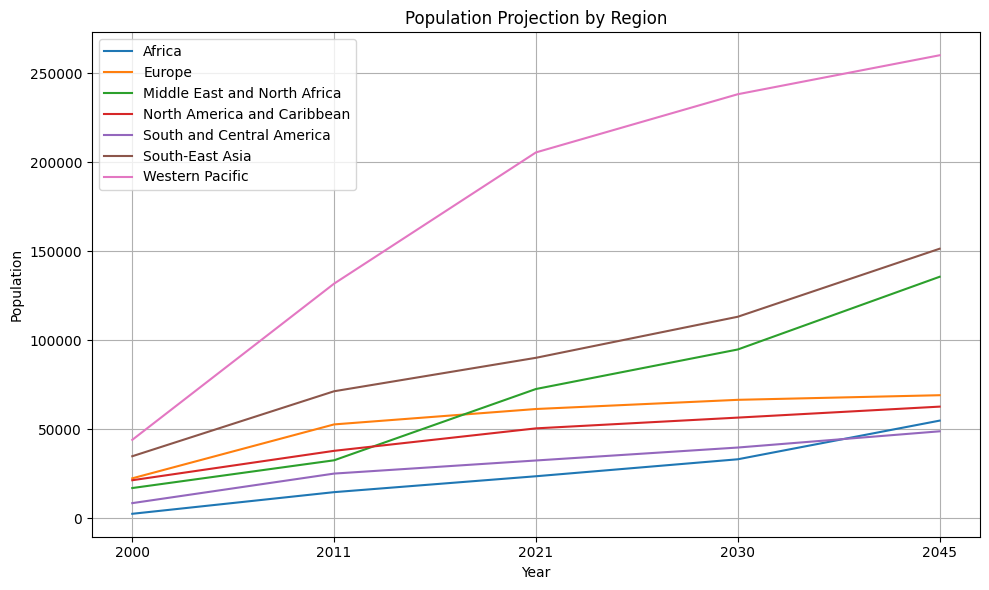

In [10]:
years = ['2000', '2011', '2021', '2030', '2045']

plt.figure(figsize=(10, 6))

for region, values in regions.items():
    plt.plot(years, list(values.values()), label=region)

plt.title('Population Projection by Region')
plt.xlabel('Year')
plt.ylabel('Population')
plt.legend()
plt.grid(True)
plt.tight_layout()
plt.show()

In [11]:
data[data["Region"] == "Western Pacific"]

,#,Region,Country/Territory,2000,2011,2021,2030,2045,Type
6,7,Western Pacific,Western Pacific,"44,097.9","131,895.1","205,640.2","238,300.0","260,200.0",Region
10,11,Western Pacific,American Samoa,-,-,7.8,8.4,8.9,Country
18,19,Western Pacific,Australia,781.3,"1,292.1","1,491.8","1,693.0","1,935.2",Country
36,37,Western Pacific,Brunei Darussalam,-,19.3,35,42,47.3,Country
41,42,Western Pacific,Cambodia,-,199.4,596,776.2,"1,094.6",Country
49,50,Western Pacific,China,"22,564.8","90,045.1","140,869.6","164,069.5","174,433.5",Country
50,51,Western Pacific,"China, Hong Kong SAR",614.4,525.4,686,837,831.1,Country
51,52,Western Pacific,"China, Macao SAR",34.5,32.7,50.9,69.5,81.3,Country
55,56,Western Pacific,Cook Islands,-,1,-,-,-,Country
63,64,Western Pacific,Democratic People's Republic of Korea,-,"1,507.5","1,847.1","2,070.6","2,295.9",Country


Diabetes prevalence (%)

In [12]:
data = all_data["Diabetes prevalence (%)"]
data

,#,Region,Country/Territory,2000,2011,2021,2030,2045,Type
0,1,Africa,Africa,1.2,4.5,5.3,5.5,5.6,Region
1,2,Europe,Europe,4.9,6.7,7,8,8.7,Region
2,3,Middle East and North Africa,Middle East and North Africa,7.7,11,18.1,19.6,20.4,Region
3,4,North America and Caribbean,North America and Caribbean,7.8,10.7,11.9,13.3,14.2,Region
4,5,South and Central America,South and Central America,3.7,9.2,8.2,9.2,9.9,Region
...,...,...,...,...,...,...,...,...,...
226,227,South and Central America,Venezuela (Bolivarian Republic of),-,10.2,9.6,11.9,12.7,Country
227,228,Western Pacific,Viet Nam,-,3.2,6.1,6.7,7.1,Country
228,229,Middle East and North Africa,Yemen,-,9.6,5.4,5.7,5.7,Country
229,230,Africa,Zambia,-,4.8,11.9,13.2,14,Country


In [13]:
data.notna().sum()

#                    231
Region               231
Country/Territory    231
2000                 231
2011                 231
2021                 231
2030                 231
2045                 231
Type                 231
dtype: int64

In [14]:
regions = {name: {} for name in data.Region.unique()}

for row in data.iterrows():
    row = row[1]
    reqion_dict = regions[row["Region"]]
    reqion_dict["2000"] = reqion_dict.get("2000", 0) + get_value(row[2000])
    reqion_dict["2011"] = reqion_dict.get("2011", 0) + get_value(row[2011])
    reqion_dict["2021"] = reqion_dict.get("2021", 0) + get_value(row[2021])
    reqion_dict["2030"] = reqion_dict.get("2030", 0) + get_value(row[2030])
    reqion_dict["2045"] = reqion_dict.get("2045", 0) + get_value(row[2045])